In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=ToTensor()
)

x_ori = training_data.data / training_data.data.max().to(torch.float)
x_ori.max()

tensor(1.)

In [2]:
def show_images(images):
    nr = len(images) // 10
    imgs = images

    _, axs = plt.subplots(nr, 10, figsize=[20, 2 * nr])
    
    for ax, img in zip(axs.flat, imgs):
        ax.imshow(img, cmap='gray', vmax=1, vmin=0)
        ax.axis('off')
    plt.tight_layout()


In [7]:
def show_images_5(images):
    nr = len(images) // 5
    imgs = images

    _, axs = plt.subplots(nr, 5, figsize=[20, 4 * nr])
    
    for ax, img in zip(axs.flat, imgs):
        ax.imshow(img, cmap='gray', vmax=1, vmin=0)
        ax.axis('off')
    plt.tight_layout()


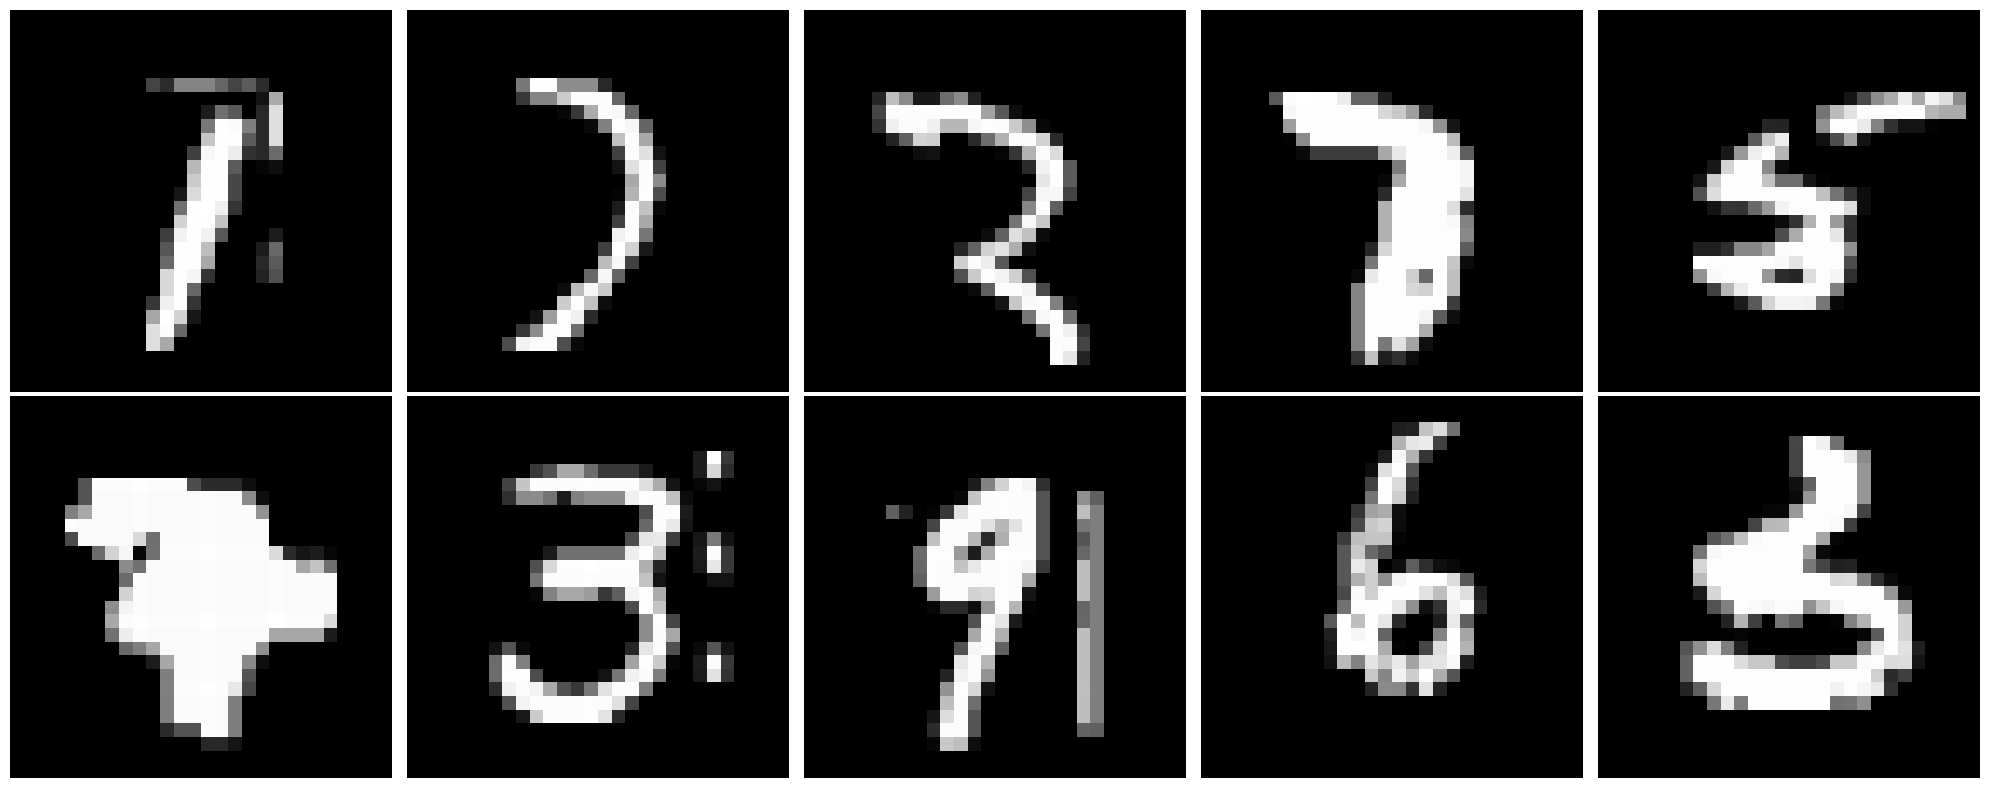

In [8]:
show_images_5(x_ori[torch.tensor([67, 140, 500, 1400, 1509, 1618, 1677, 1875, 2296, 2803]).to(torch.long)])

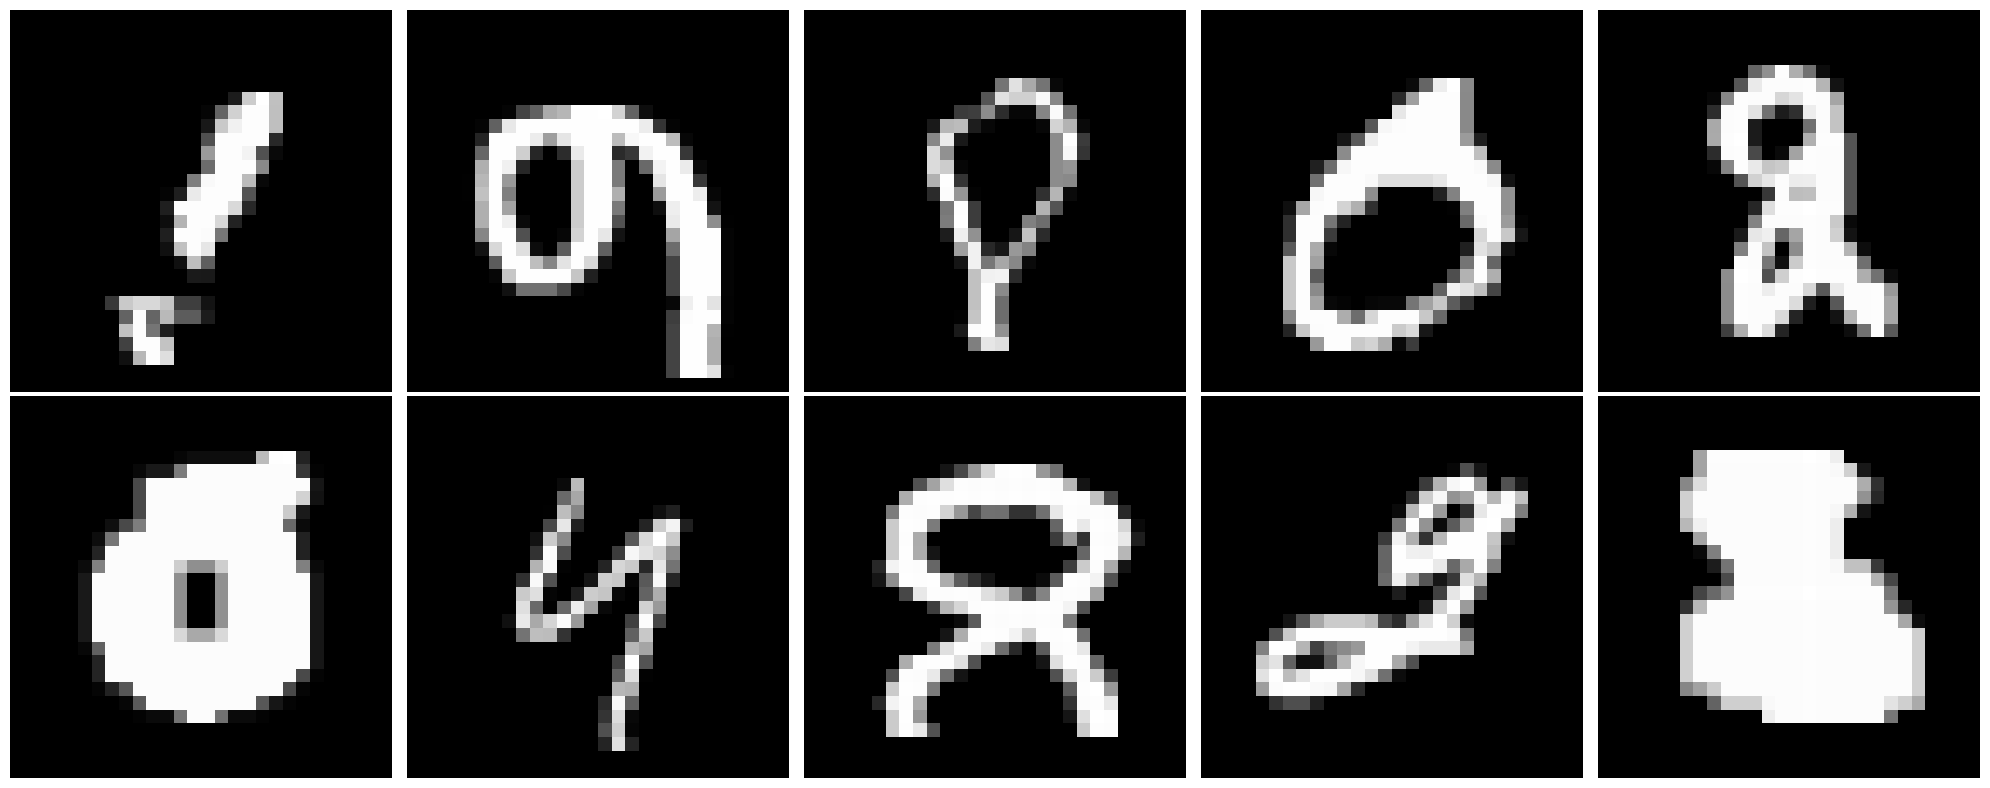

In [9]:
show_images_5(x_ori[torch.tensor([2831, 3382, 3570, 3673, 4028, 4201, 4522, 4761, 5065, 5972]).to(torch.long)])

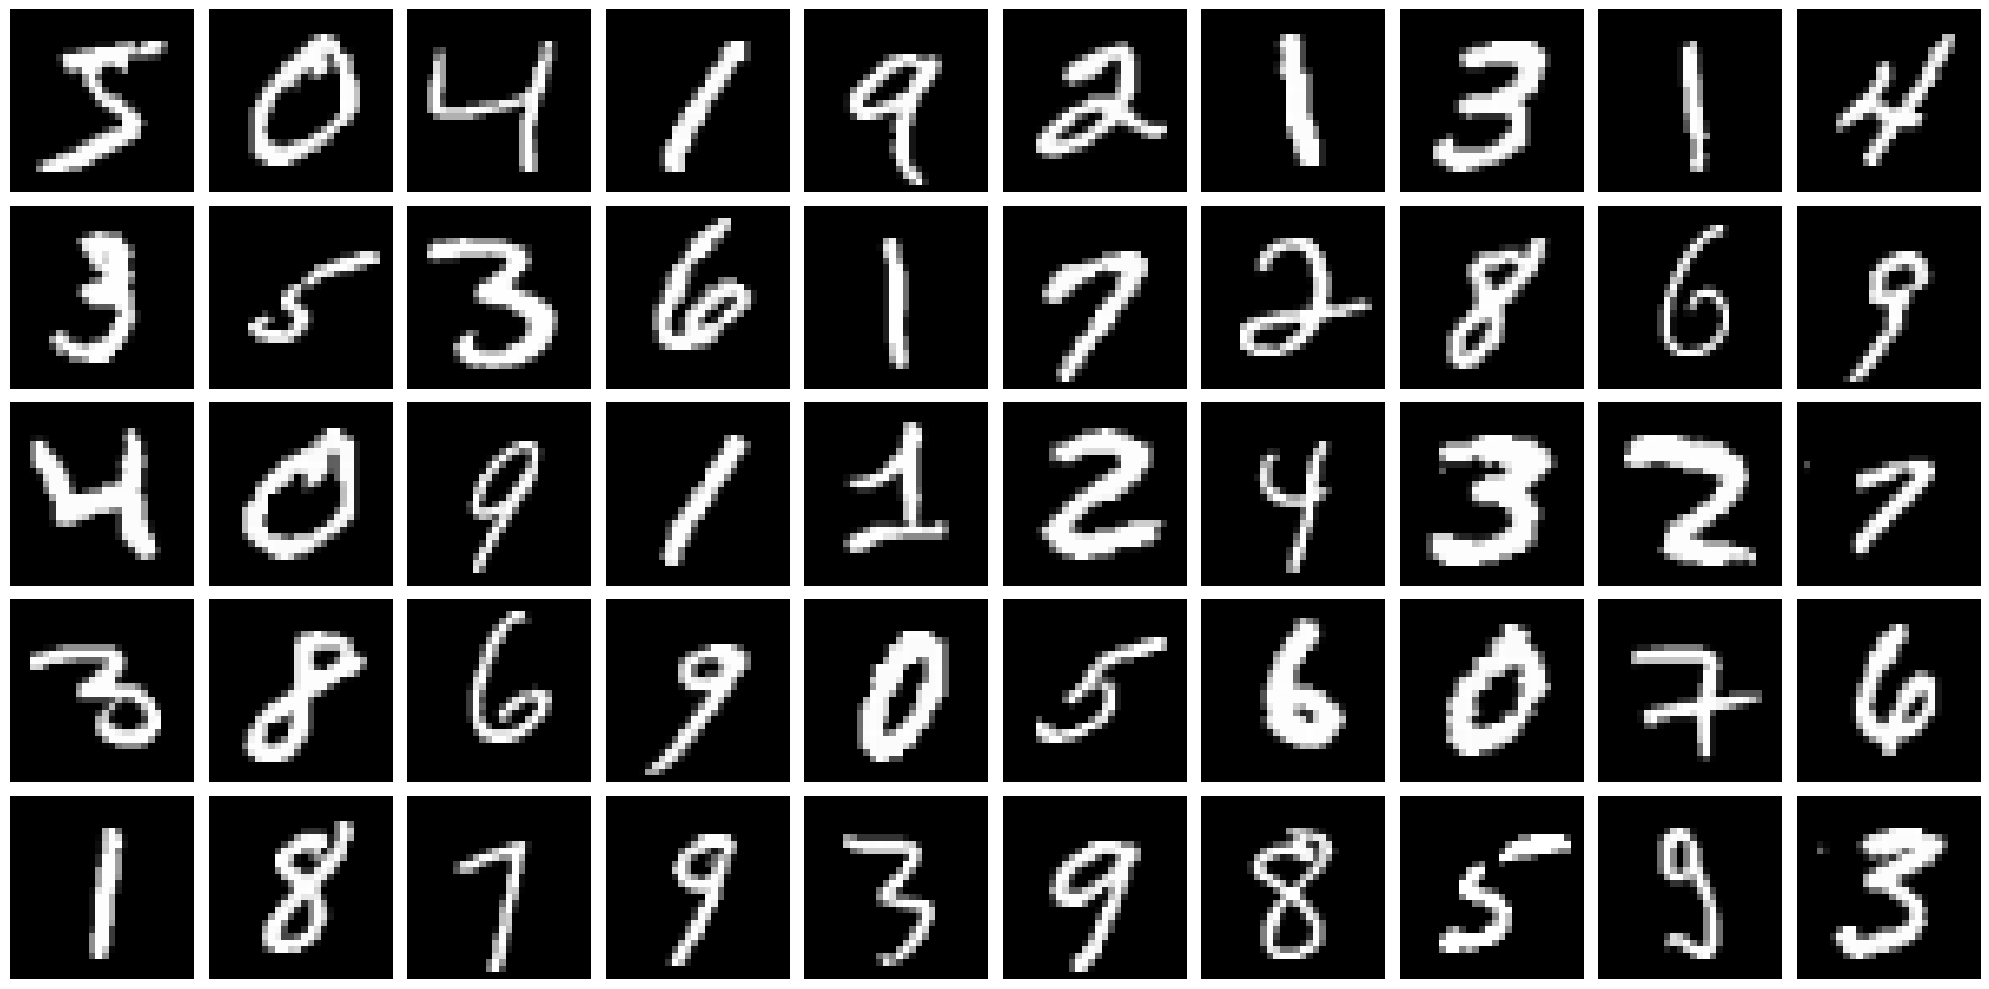

In [4]:
pn = 100
show_images(x_ori[:50])

3.582752874935977 [-1.57821518e+02  2.65327627e+03 -2.25241136e+04  1.11955424e+05
 -3.48853532e+05  7.00996718e+05 -9.07411665e+05  7.30826254e+05
 -3.33081781e+05  6.55945716e+04]


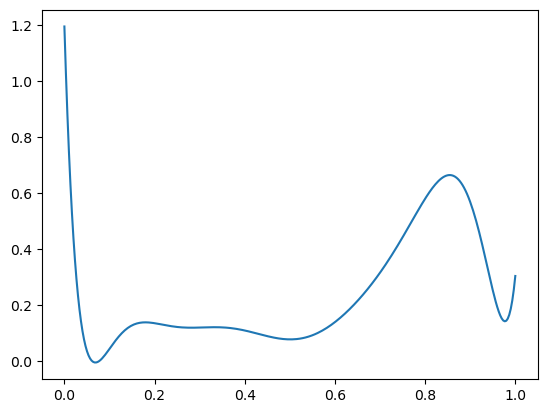

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(x.view(-1, 1))

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, (y + 1).log())
print(lin_reg.intercept_ , lin_reg.coef_)

plt.plot(torch.linspace(0, 1, 300).view(-1, 1), lin_reg.predict(poly_features.transform(torch.linspace(0, 1, 300).view(-1, 1))) / 3)

In [19]:
x=torch.tensor([0.3]*3)
print(x.sum())
print(x.exp().sum())

x=torch.tensor([0.6, 0.1, 0.2])
print(x.sum())
print(x.exp().sum())

tensor(0.9000)
tensor(4.0496)
tensor(0.9000)
tensor(4.1487)


In [18]:
x

tensor([0.6000, 0.0000, 1.0000, 0.0000, 2.0000])